In [1]:
import logging
import os

import numpy as np
from sklearn.model_selection import train_test_split

from galaxy_datasets.pytorch.galaxy_datamodule import GalaxyDataModule
from galaxy_datasets.shared.demo_gz_candels import demo_gz_candels

from zoobot.pytorch.training import finetune, representations
from zoobot.pytorch.predictions import predict_on_catalog
from zoobot.shared.schemas import gz_candels_ortho_schema
from zoobot.shared.load_predictions import prediction_hdf5_to_summary_parquet


C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [72]:
np.__file__

'C:\\Users\\William\\anaconda3\\envs\\zoobot\\lib\\site-packages\\numpy\\__init__.py'

In [73]:
np.__version__

'1.26.4'

In [74]:
logging.basicConfig(level=logging.INFO)

schema = gz_candels_ortho_schema

In [20]:
repo_dir = 'C:/Users/William'
accelerator = 'gpu'

In [13]:
train_and_val_catalog, _ = demo_gz_candels(root = data_download_dir, train=True, download = False)
test_catalog, _ = demo_gz_candels(root = data_download_dir, train = True, download = False)

In [14]:
train_catalog, val_catalog = train_test_split(train_and_val_catalog, test_size = 0.3)

In [15]:
train_catalog

,ra,dec,smooth-or-featured-candels_smooth_fraction,smooth-or-featured-candels_features_fraction,smooth-or-featured-candels_artifact_fraction,smooth-or-featured-candels_total-votes,how-rounded-candels_completely_fraction,how-rounded-candels_in-between_fraction,how-rounded-candels_cigar-shaped_fraction,how-rounded-candels_total-votes,...,bulge-size-candels_none,bulge-size-candels_obvious,bulge-size-candels_dominant,merging-candels_merger,merging-candels_tidal-debris,merging-candels_both,merging-candels_neither,id_str,filename,file_loc
169,53.081300,-27.712190,0.297297,0.189189,0.513514,37.0,0.090909,0.909091,0.000000,11.0,...,4.0,0.0,0.0,4.0,2.0,3.0,9.0,GDS_23747,GDS_23747.jpg,D:/demo_gz_candels\images\GDS_23747.jpg
525,53.209354,-27.740119,0.361111,0.138889,0.500000,36.0,0.230769,0.461538,0.307692,13.0,...,0.0,0.0,0.0,2.0,0.0,1.0,15.0,GDS_18998,GDS_18998.jpg,D:/demo_gz_candels\images\GDS_18998.jpg
597,53.080776,-27.681002,0.424658,0.301370,0.273973,73.0,0.483871,0.516129,0.000000,31.0,...,1.0,9.0,3.0,2.0,1.0,4.0,46.0,GDS_24561,GDS_24561.jpg,D:/demo_gz_candels\images\GDS_24561.jpg
747,150.111740,2.191270,0.357143,0.071429,0.571429,14.0,0.200000,0.800000,0.000000,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,COS_878,COS_878.jpg,D:/demo_gz_candels\images\COS_878.jpg
90,53.125503,-27.853901,0.675676,0.148649,0.175676,74.0,0.140000,0.860000,0.000000,50.0,...,2.0,1.0,0.0,4.0,3.0,1.0,53.0,GDS_6053,GDS_6053.jpg,D:/demo_gz_candels\images\GDS_6053.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,34.417059,-5.200871,0.473684,0.131579,0.394737,38.0,0.611111,0.388889,0.000000,18.0,...,1.0,0.0,0.0,5.0,2.0,3.0,13.0,UDS_13533,UDS_13533.jpg,D:/demo_gz_candels\images\UDS_13533.jpg
65,34.394038,-5.125491,0.315789,0.078947,0.605263,38.0,0.333333,0.583333,0.083333,12.0,...,2.0,0.0,0.0,5.0,3.0,0.0,7.0,UDS_23175,UDS_23175.jpg,D:/demo_gz_candels\images\UDS_23175.jpg
682,34.499773,-5.263693,0.474359,0.269231,0.256410,78.0,0.891892,0.108108,0.000000,37.0,...,1.0,4.0,1.0,7.0,4.0,2.0,45.0,UDS_2358,UDS_2358.jpg,D:/demo_gz_candels\images\UDS_2358.jpg
634,150.089510,2.242756,0.054054,0.027027,0.918919,37.0,0.000000,1.000000,0.000000,2.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,COS_5615,COS_5615.jpg,D:/demo_gz_candels\images\COS_5615.jpg


In [21]:
print(train_catalog.columns)

Index(['ra', 'dec', 'smooth-or-featured-candels_smooth_fraction',
       'smooth-or-featured-candels_features_fraction',
       'smooth-or-featured-candels_artifact_fraction',
       'smooth-or-featured-candels_total-votes',
       'how-rounded-candels_completely_fraction',
       'how-rounded-candels_in-between_fraction',
       'how-rounded-candels_cigar-shaped_fraction',
       'how-rounded-candels_total-votes',
       ...
       'bulge-size-candels_none', 'bulge-size-candels_obvious',
       'bulge-size-candels_dominant', 'merging-candels_merger',
       'merging-candels_tidal-debris', 'merging-candels_both',
       'merging-candels_neither', 'id_str', 'filename', 'file_loc'],
      dtype='object', length=110)


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
print(train_catalog.columns.tolist())

['ra', 'dec', 'smooth-or-featured-candels_smooth_fraction', 'smooth-or-featured-candels_features_fraction', 'smooth-or-featured-candels_artifact_fraction', 'smooth-or-featured-candels_total-votes', 'how-rounded-candels_completely_fraction', 'how-rounded-candels_in-between_fraction', 'how-rounded-candels_cigar-shaped_fraction', 'how-rounded-candels_total-votes', 'clumpy-appearance-candels_yes_fraction', 'clumpy-appearance-candels_no_fraction', 'clumpy-appearance-candels_total-votes', 'clump-count-candels_1_fraction', 'clump-count-candels_2_fraction', 'clump-count-candels_3_fraction', 'clump-count-candels_4_fraction', 'clump-count-candels_5-plus_fraction', 'clump-count-candels_cant-tell_fraction', 'clump-count-candels_total-votes', 'clump-configuration_straight-line_fraction', 'clump-configuration_chain_fraction', 'clump-configuration_cluster-or-irregular_fraction', 'clump-configuration_spiral_fraction', 'clump-configuration_total-votes', 'one-clump-brightest_yes_fraction', 'one-clump-br

In [37]:
filtered_cols = [col for col in df.columns if "fraction" not in col]
len(filtered_cols)

38

In [17]:
print(gz_candels_ortho_schema)

In [6]:
resize_after_crop = 224 # must match how checkpoint below was trained
datamodule = GalaxyDataModule(
    label_cols=schema.label_cols,
    train_catalog=train_catalog,
    val_catalog=val_catalog,
    test_catalog=test_catalog,
    batch_size=32,
    # uses default_augs
    resize_after_crop=resize_after_crop  
)

INFO:root:Num workers: 4
INFO:root:Prefetch factor: 4
INFO:root:Using albumentations transform for augmentations
INFO:root:Using basic albumentations transforms for augmentations


In [7]:
model = finetune.FinetuneableZoobotTree(
        name='hf_hub:mwalmsley/zoobot-encoder-convnext_nano',
        schema=schema
    )

INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (mwalmsley/zoobot-encoder-convnext_nano)
C:\Users\William\anaconda3\envs\zoobot39_torch\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
INFO:root:Using dropout+dirichlet head and dirichlet (count) loss
INFO:root:Not using test-time dropout


In [8]:
save_dir = os.path.join(
        repo_dir, f'gz-decals-classifiers/results/finetune_{np.random.randint(1e8)}')

In [10]:
trainer = finetune.get_trainer(save_dir=save_dir, logger=None, accelerator=accelerator)
trainer.fit(model, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\William\anaconda3\envs\zoobot39_torch\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:root:Encoder architecture to finetune: <class 'timm.models.convnext.ConvNeXt'>
INFO:root:possible blocks to tune: 5
INFO:root:blocks that will be tuned: 0
INFO:root:Remaining blocks: 5
INFO:root:param groups: 1
INFO:root:Optimizer ready, configuring scheduler
INFO:root:Learning rate sche

C:\Users\William\anaconda3\envs\zoobot39_torch\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|█████████████████████████████████████████████████████████████████████| 17/17 [00:09<00:00,  1.78it/s, v_num=2]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|█████████████| 17/17 [00:10<00:00,  1.57it/s, v_num=2, finetuning/val_loss=3.920, finetuning/train_loss=4.320]

Epoch 0, global step 17: 'finetuning/val_loss' reached 3.92107 (best 3.92107), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\0.ckpt' as top 1


Epoch 1: 100%|█████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=3.920, finetuning/train_loss=4.320]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|█████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=3.480, finetuning/train_loss=3.810]

Epoch 1, global step 34: 'finetuning/val_loss' reached 3.48411 (best 3.48411), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\1.ckpt' as top 1


Epoch 2: 100%|█████████████| 17/17 [00:08<00:00,  1.96it/s, v_num=2, finetuning/val_loss=3.480, finetuning/train_loss=3.810]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|█████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=3.140, finetuning/train_loss=3.410]

Epoch 2, global step 51: 'finetuning/val_loss' reached 3.14248 (best 3.14248), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\2.ckpt' as top 1


Epoch 3: 100%|█████████████| 17/17 [00:08<00:00,  1.95it/s, v_num=2, finetuning/val_loss=3.140, finetuning/train_loss=3.410]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|█████████████| 17/17 [00:10<00:00,  1.69it/s, v_num=2, finetuning/val_loss=2.890, finetuning/train_loss=3.110]

Epoch 3, global step 68: 'finetuning/val_loss' reached 2.88568 (best 2.88568), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\3.ckpt' as top 1


Epoch 4: 100%|█████████████| 17/17 [00:08<00:00,  1.99it/s, v_num=2, finetuning/val_loss=2.890, finetuning/train_loss=3.110]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|█████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.680, finetuning/train_loss=2.820]

Epoch 4, global step 85: 'finetuning/val_loss' reached 2.68380 (best 2.68380), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\4.ckpt' as top 1


Epoch 5: 100%|█████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=2.680, finetuning/train_loss=2.820]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|█████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.530, finetuning/train_loss=2.650]

Epoch 5, global step 102: 'finetuning/val_loss' reached 2.52615 (best 2.52615), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\5.ckpt' as top 1


Epoch 6: 100%|█████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=2.530, finetuning/train_loss=2.650]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|█████████████| 17/17 [00:09<00:00,  1.74it/s, v_num=2, finetuning/val_loss=2.410, finetuning/train_loss=2.500]

Epoch 6, global step 119: 'finetuning/val_loss' reached 2.41059 (best 2.41059), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\6.ckpt' as top 1


Epoch 7: 100%|█████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=2.410, finetuning/train_loss=2.500]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|█████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.310, finetuning/train_loss=2.410]

Epoch 7, global step 136: 'finetuning/val_loss' reached 2.31052 (best 2.31052), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\7.ckpt' as top 1


Epoch 8: 100%|█████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=2.310, finetuning/train_loss=2.410]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 8: 100%|█████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=2.230, finetuning/train_loss=2.300]

Epoch 8, global step 153: 'finetuning/val_loss' reached 2.23388 (best 2.23388), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\8.ckpt' as top 1


Epoch 9: 100%|█████████████| 17/17 [00:08<00:00,  1.99it/s, v_num=2, finetuning/val_loss=2.230, finetuning/train_loss=2.300]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|█████████████| 17/17 [00:09<00:00,  1.74it/s, v_num=2, finetuning/val_loss=2.160, finetuning/train_loss=2.230]

Epoch 9, global step 170: 'finetuning/val_loss' reached 2.16141 (best 2.16141), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\9.ckpt' as top 1


Epoch 10: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=2.160, finetuning/train_loss=2.230]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 10: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.120, finetuning/train_loss=2.160]

Epoch 10, global step 187: 'finetuning/val_loss' reached 2.11544 (best 2.11544), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\10.ckpt' as top 1


Epoch 11: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=2.120, finetuning/train_loss=2.160]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 11: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.070, finetuning/train_loss=2.110]

Epoch 11, global step 204: 'finetuning/val_loss' reached 2.06752 (best 2.06752), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\11.ckpt' as top 1


Epoch 12: 100%|████████████| 17/17 [00:08<00:00,  1.99it/s, v_num=2, finetuning/val_loss=2.070, finetuning/train_loss=2.110]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 12: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=2.030, finetuning/train_loss=2.060]

Epoch 12, global step 221: 'finetuning/val_loss' reached 2.02761 (best 2.02761), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\12.ckpt' as top 1


Epoch 13: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=2.030, finetuning/train_loss=2.060]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 13: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.990, finetuning/train_loss=2.030]

Epoch 13, global step 238: 'finetuning/val_loss' reached 1.99426 (best 1.99426), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\13.ckpt' as top 1


Epoch 14: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.990, finetuning/train_loss=2.030]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 14: 100%|████████████| 17/17 [00:10<00:00,  1.68it/s, v_num=2, finetuning/val_loss=1.970, finetuning/train_loss=2.000]

Epoch 14, global step 255: 'finetuning/val_loss' reached 1.97263 (best 1.97263), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\14.ckpt' as top 1


Epoch 15: 100%|████████████| 17/17 [00:08<00:00,  1.96it/s, v_num=2, finetuning/val_loss=1.970, finetuning/train_loss=2.000]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 15: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.940, finetuning/train_loss=1.970]

Epoch 15, global step 272: 'finetuning/val_loss' reached 1.94408 (best 1.94408), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\15.ckpt' as top 1


Epoch 16: 100%|████████████| 17/17 [00:08<00:00,  1.94it/s, v_num=2, finetuning/val_loss=1.940, finetuning/train_loss=1.970]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 16: 100%|████████████| 17/17 [00:10<00:00,  1.69it/s, v_num=2, finetuning/val_loss=1.930, finetuning/train_loss=1.960]

Epoch 16, global step 289: 'finetuning/val_loss' reached 1.92578 (best 1.92578), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\16.ckpt' as top 1


Epoch 17: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.930, finetuning/train_loss=1.960]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 17: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.900, finetuning/train_loss=1.920]

Epoch 17, global step 306: 'finetuning/val_loss' reached 1.90431 (best 1.90431), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\17.ckpt' as top 1


Epoch 18: 100%|████████████| 17/17 [00:09<00:00,  1.83it/s, v_num=2, finetuning/val_loss=1.900, finetuning/train_loss=1.920]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 18: 100%|████████████| 17/17 [00:10<00:00,  1.59it/s, v_num=2, finetuning/val_loss=1.890, finetuning/train_loss=1.910]

Epoch 18, global step 323: 'finetuning/val_loss' reached 1.89106 (best 1.89106), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\18.ckpt' as top 1


Epoch 19: 100%|████████████| 17/17 [00:09<00:00,  1.84it/s, v_num=2, finetuning/val_loss=1.890, finetuning/train_loss=1.910]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 19: 100%|████████████| 17/17 [00:10<00:00,  1.61it/s, v_num=2, finetuning/val_loss=1.880, finetuning/train_loss=1.890]

Epoch 19, global step 340: 'finetuning/val_loss' reached 1.87625 (best 1.87625), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\19.ckpt' as top 1


Epoch 20: 100%|████████████| 17/17 [00:09<00:00,  1.83it/s, v_num=2, finetuning/val_loss=1.880, finetuning/train_loss=1.890]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 20: 100%|████████████| 17/17 [00:10<00:00,  1.60it/s, v_num=2, finetuning/val_loss=1.870, finetuning/train_loss=1.880]

Epoch 20, global step 357: 'finetuning/val_loss' reached 1.86549 (best 1.86549), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\20.ckpt' as top 1


Epoch 21: 100%|████████████| 17/17 [00:09<00:00,  1.83it/s, v_num=2, finetuning/val_loss=1.870, finetuning/train_loss=1.880]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 21: 100%|████████████| 17/17 [00:10<00:00,  1.60it/s, v_num=2, finetuning/val_loss=1.850, finetuning/train_loss=1.870]

Epoch 21, global step 374: 'finetuning/val_loss' reached 1.85073 (best 1.85073), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\21.ckpt' as top 1


Epoch 22: 100%|████████████| 17/17 [00:09<00:00,  1.78it/s, v_num=2, finetuning/val_loss=1.850, finetuning/train_loss=1.870]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 22: 100%|████████████| 17/17 [00:10<00:00,  1.56it/s, v_num=2, finetuning/val_loss=1.840, finetuning/train_loss=1.860]

Epoch 22, global step 391: 'finetuning/val_loss' reached 1.84060 (best 1.84060), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\22.ckpt' as top 1


Epoch 23: 100%|████████████| 17/17 [00:09<00:00,  1.83it/s, v_num=2, finetuning/val_loss=1.840, finetuning/train_loss=1.860]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 23: 100%|████████████| 17/17 [00:10<00:00,  1.61it/s, v_num=2, finetuning/val_loss=1.830, finetuning/train_loss=1.870]

Epoch 23, global step 408: 'finetuning/val_loss' reached 1.83281 (best 1.83281), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\23.ckpt' as top 1


Epoch 24: 100%|████████████| 17/17 [00:09<00:00,  1.78it/s, v_num=2, finetuning/val_loss=1.830, finetuning/train_loss=1.870]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 24: 100%|████████████| 17/17 [00:10<00:00,  1.57it/s, v_num=2, finetuning/val_loss=1.820, finetuning/train_loss=1.830]

Epoch 24, global step 425: 'finetuning/val_loss' reached 1.82129 (best 1.82129), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\24.ckpt' as top 1


Epoch 25: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.820, finetuning/train_loss=1.830]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 25: 100%|████████████| 17/17 [00:10<00:00,  1.68it/s, v_num=2, finetuning/val_loss=1.820, finetuning/train_loss=1.830]

Epoch 25, global step 442: 'finetuning/val_loss' reached 1.81850 (best 1.81850), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\25.ckpt' as top 1


Epoch 26: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.820, finetuning/train_loss=1.830]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 26: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.800, finetuning/train_loss=1.830]

Epoch 26, global step 459: 'finetuning/val_loss' reached 1.80455 (best 1.80455), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\26.ckpt' as top 1


Epoch 27: 100%|████████████| 17/17 [00:08<00:00,  1.95it/s, v_num=2, finetuning/val_loss=1.800, finetuning/train_loss=1.830]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 27: 100%|████████████| 17/17 [00:10<00:00,  1.70it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.820]

Epoch 27, global step 476: 'finetuning/val_loss' reached 1.79307 (best 1.79307), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\27.ckpt' as top 1


Epoch 28: 100%|████████████| 17/17 [00:09<00:00,  1.89it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.820]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 28: 100%|████████████| 17/17 [00:10<00:00,  1.65it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]

Epoch 28, global step 493: 'finetuning/val_loss' reached 1.78918 (best 1.78918), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\28.ckpt' as top 1


Epoch 29: 100%|████████████| 17/17 [00:09<00:00,  1.83it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 29: 100%|████████████| 17/17 [00:10<00:00,  1.61it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]

Epoch 29, global step 510: 'finetuning/val_loss' was not in top 1


Epoch 30: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 30: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]

Epoch 30, global step 527: 'finetuning/val_loss' reached 1.78633 (best 1.78633), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\30.ckpt' as top 1


Epoch 31: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.790, finetuning/train_loss=1.800]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 31: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.780, finetuning/train_loss=1.800]

Epoch 31, global step 544: 'finetuning/val_loss' reached 1.77715 (best 1.77715), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\31.ckpt' as top 1


Epoch 32: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.780, finetuning/train_loss=1.800]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 32: 100%|████████████| 17/17 [00:10<00:00,  1.63it/s, v_num=2, finetuning/val_loss=1.770, finetuning/train_loss=1.780]

Epoch 32, global step 561: 'finetuning/val_loss' reached 1.76612 (best 1.76612), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\32.ckpt' as top 1


Epoch 33: 100%|████████████| 17/17 [00:09<00:00,  1.84it/s, v_num=2, finetuning/val_loss=1.770, finetuning/train_loss=1.780]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 33: 100%|████████████| 17/17 [00:10<00:00,  1.61it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.780]

Epoch 33, global step 578: 'finetuning/val_loss' reached 1.76460 (best 1.76460), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\33.ckpt' as top 1


Epoch 34: 100%|████████████| 17/17 [00:08<00:00,  1.94it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.780]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 34: 100%|████████████| 17/17 [00:09<00:00,  1.70it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.770]

Epoch 34, global step 595: 'finetuning/val_loss' reached 1.75914 (best 1.75914), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\34.ckpt' as top 1


Epoch 35: 100%|████████████| 17/17 [00:09<00:00,  1.80it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.770]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 35: 100%|████████████| 17/17 [00:10<00:00,  1.56it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.780]

Epoch 35, global step 612: 'finetuning/val_loss' reached 1.75558 (best 1.75558), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\35.ckpt' as top 1


Epoch 36: 100%|████████████| 17/17 [00:09<00:00,  1.78it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.780]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 36: 100%|████████████| 17/17 [00:10<00:00,  1.57it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.770]

Epoch 36, global step 629: 'finetuning/val_loss' reached 1.75545 (best 1.75545), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\36.ckpt' as top 1


Epoch 37: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.760, finetuning/train_loss=1.770]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 37: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.750]

Epoch 37, global step 646: 'finetuning/val_loss' reached 1.75330 (best 1.75330), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\37.ckpt' as top 1


Epoch 38: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.750]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 38: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]

Epoch 38, global step 663: 'finetuning/val_loss' reached 1.74642 (best 1.74642), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\38.ckpt' as top 1


Epoch 39: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 39: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]

Epoch 39, global step 680: 'finetuning/val_loss' was not in top 1


Epoch 40: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 40: 100%|████████████| 17/17 [00:10<00:00,  1.68it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]

Epoch 40, global step 697: 'finetuning/val_loss' reached 1.74545 (best 1.74545), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\40.ckpt' as top 1


Epoch 41: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.750, finetuning/train_loss=1.760]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 41: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.760]

Epoch 41, global step 714: 'finetuning/val_loss' reached 1.74201 (best 1.74201), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\41.ckpt' as top 1


Epoch 42: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.760]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 42: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]

Epoch 42, global step 731: 'finetuning/val_loss' reached 1.73549 (best 1.73549), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\42.ckpt' as top 1


Epoch 43: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 43: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]

Epoch 43, global step 748: 'finetuning/val_loss' was not in top 1


Epoch 44: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 44: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.730]

Epoch 44, global step 765: 'finetuning/val_loss' reached 1.73390 (best 1.73390), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\44.ckpt' as top 1


Epoch 45: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.730]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 45: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]

Epoch 45, global step 782: 'finetuning/val_loss' was not in top 1


Epoch 46: 100%|████████████| 17/17 [00:09<00:00,  1.84it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 46: 100%|████████████| 17/17 [00:10<00:00,  1.61it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]

Epoch 46, global step 799: 'finetuning/val_loss' was not in top 1


Epoch 47: 100%|████████████| 17/17 [00:09<00:00,  1.85it/s, v_num=2, finetuning/val_loss=1.740, finetuning/train_loss=1.740]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 47: 100%|████████████| 17/17 [00:10<00:00,  1.63it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.710]

Epoch 47, global step 816: 'finetuning/val_loss' reached 1.73007 (best 1.73007), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\47.ckpt' as top 1


Epoch 48: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 48: 100%|████████████| 17/17 [00:10<00:00,  1.69it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.730]

Epoch 48, global step 833: 'finetuning/val_loss' was not in top 1


Epoch 49: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.730]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]

Epoch 49, global step 850: 'finetuning/val_loss' was not in top 1


Epoch 50: 100%|████████████| 17/17 [00:09<00:00,  1.89it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 50: 100%|████████████| 17/17 [00:10<00:00,  1.65it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]

Epoch 50, global step 867: 'finetuning/val_loss' reached 1.72686 (best 1.72686), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\50.ckpt' as top 1


Epoch 51: 100%|████████████| 17/17 [00:08<00:00,  1.96it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.720]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 51: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.730]

Epoch 51, global step 884: 'finetuning/val_loss' reached 1.72324 (best 1.72324), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\51.ckpt' as top 1


Epoch 52: 100%|████████████| 17/17 [00:08<00:00,  1.99it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.730]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 52: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.710]

Epoch 52, global step 901: 'finetuning/val_loss' was not in top 1


Epoch 53: 100%|████████████| 17/17 [00:09<00:00,  1.87it/s, v_num=2, finetuning/val_loss=1.730, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 53: 100%|████████████| 17/17 [00:10<00:00,  1.64it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]

Epoch 53, global step 918: 'finetuning/val_loss' was not in top 1


Epoch 54: 100%|████████████| 17/17 [00:09<00:00,  1.87it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 54: 100%|████████████| 17/17 [00:10<00:00,  1.63it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]

Epoch 54, global step 935: 'finetuning/val_loss' reached 1.72235 (best 1.72235), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\54.ckpt' as top 1


Epoch 55: 100%|████████████| 17/17 [00:09<00:00,  1.88it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 55: 100%|████████████| 17/17 [00:10<00:00,  1.65it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]

Epoch 55, global step 952: 'finetuning/val_loss' was not in top 1


Epoch 56: 100%|████████████| 17/17 [00:08<00:00,  1.96it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 56: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.720]

Epoch 56, global step 969: 'finetuning/val_loss' reached 1.71387 (best 1.71387), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\56.ckpt' as top 1


Epoch 57: 100%|████████████| 17/17 [00:08<00:00,  1.94it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.720]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 57: 100%|████████████| 17/17 [00:09<00:00,  1.70it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]

Epoch 57, global step 986: 'finetuning/val_loss' reached 1.71039 (best 1.71039), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\57.ckpt' as top 1


Epoch 58: 100%|████████████| 17/17 [00:09<00:00,  1.74it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 58: 100%|████████████| 17/17 [00:11<00:00,  1.54it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.710]

Epoch 58, global step 1003: 'finetuning/val_loss' was not in top 1


Epoch 59: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 59: 100%|████████████| 17/17 [00:11<00:00,  1.53it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]

Epoch 59, global step 1020: 'finetuning/val_loss' was not in top 1


Epoch 60: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 60: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.710]

Epoch 60, global step 1037: 'finetuning/val_loss' was not in top 1


Epoch 61: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 61: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 61, global step 1054: 'finetuning/val_loss' was not in top 1


Epoch 62: 100%|████████████| 17/17 [00:09<00:00,  1.86it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 62: 100%|████████████| 17/17 [00:10<00:00,  1.64it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.690]

Epoch 62, global step 1071: 'finetuning/val_loss' was not in top 1


Epoch 63: 100%|████████████| 17/17 [00:08<00:00,  1.95it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 63: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 63, global step 1088: 'finetuning/val_loss' reached 1.70772 (best 1.70772), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\63.ckpt' as top 1


Epoch 64: 100%|████████████| 17/17 [00:08<00:00,  1.94it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 64: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 64, global step 1105: 'finetuning/val_loss' was not in top 1


Epoch 65: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 65: 100%|████████████| 17/17 [00:10<00:00,  1.68it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.700]

Epoch 65, global step 1122: 'finetuning/val_loss' was not in top 1


Epoch 66: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 66: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]

Epoch 66, global step 1139: 'finetuning/val_loss' was not in top 1


Epoch 67: 100%|████████████| 17/17 [00:08<00:00,  2.00it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.710]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 67: 100%|████████████| 17/17 [00:09<00:00,  1.74it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 67, global step 1156: 'finetuning/val_loss' was not in top 1


Epoch 68: 100%|████████████| 17/17 [00:08<00:00,  1.99it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 68: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 68, global step 1173: 'finetuning/val_loss' was not in top 1


Epoch 69: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 69: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.700]

Epoch 69, global step 1190: 'finetuning/val_loss' was not in top 1


Epoch 70: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 70: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]

Epoch 70, global step 1207: 'finetuning/val_loss' was not in top 1


Epoch 71: 100%|████████████| 17/17 [00:08<00:00,  1.95it/s, v_num=2, finetuning/val_loss=1.720, finetuning/train_loss=1.700]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 71: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]

Epoch 71, global step 1224: 'finetuning/val_loss' reached 1.70273 (best 1.70273), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\71.ckpt' as top 1


Epoch 72: 100%|████████████| 17/17 [00:08<00:00,  1.94it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 72: 100%|████████████| 17/17 [00:10<00:00,  1.69it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 72, global step 1241: 'finetuning/val_loss' was not in top 1


Epoch 73: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 73: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 73, global step 1258: 'finetuning/val_loss' was not in top 1


Epoch 74: 100%|████████████| 17/17 [00:08<00:00,  1.95it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 74: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]

Epoch 74, global step 1275: 'finetuning/val_loss' was not in top 1


Epoch 75: 100%|████████████| 17/17 [00:08<00:00,  1.96it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 75: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]

Epoch 75, global step 1292: 'finetuning/val_loss' reached 1.70099 (best 1.70099), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\75.ckpt' as top 1


Epoch 76: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 76: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]

Epoch 76, global step 1309: 'finetuning/val_loss' was not in top 1


Epoch 77: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 77: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 77, global step 1326: 'finetuning/val_loss' was not in top 1


Epoch 78: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 78: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]

Epoch 78, global step 1343: 'finetuning/val_loss' reached 1.70021 (best 1.70021), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\78.ckpt' as top 1


Epoch 79: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 79: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]

Epoch 79, global step 1360: 'finetuning/val_loss' was not in top 1


Epoch 80: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 80: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]

Epoch 80, global step 1377: 'finetuning/val_loss' was not in top 1


Epoch 81: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 81: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]

Epoch 81, global step 1394: 'finetuning/val_loss' was not in top 1


Epoch 82: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 82: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 82, global step 1411: 'finetuning/val_loss' was not in top 1


Epoch 83: 100%|████████████| 17/17 [00:08<00:00,  1.92it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 83: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]

Epoch 83, global step 1428: 'finetuning/val_loss' was not in top 1


Epoch 84: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 84: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 84, global step 1445: 'finetuning/val_loss' was not in top 1


Epoch 85: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 85: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]

Epoch 85, global step 1462: 'finetuning/val_loss' was not in top 1


Epoch 86: 100%|████████████| 17/17 [00:08<00:00,  1.98it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.690]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 86: 100%|████████████| 17/17 [00:09<00:00,  1.73it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]

Epoch 86, global step 1479: 'finetuning/val_loss' was not in top 1


Epoch 87: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.710, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 87: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]

Epoch 87, global step 1496: 'finetuning/val_loss' reached 1.69917 (best 1.69917), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\87.ckpt' as top 1


Epoch 88: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 88: 100%|████████████| 17/17 [00:09<00:00,  1.71it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]

Epoch 88, global step 1513: 'finetuning/val_loss' was not in top 1


Epoch 89: 100%|████████████| 17/17 [00:08<00:00,  1.97it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 89: 100%|████████████| 17/17 [00:09<00:00,  1.72it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 89, global step 1530: 'finetuning/val_loss' reached 1.69852 (best 1.69852), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\89.ckpt' as top 1


Epoch 90: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 90: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]

Epoch 90, global step 1547: 'finetuning/val_loss' was not in top 1


Epoch 91: 100%|████████████| 17/17 [00:08<00:00,  1.93it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 91: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]

Epoch 91, global step 1564: 'finetuning/val_loss' was not in top 1


Epoch 92: 100%|████████████| 17/17 [00:09<00:00,  1.86it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.680]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 92: 100%|████████████| 17/17 [00:10<00:00,  1.63it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 92, global step 1581: 'finetuning/val_loss' was not in top 1


Epoch 93: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 93: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 93, global step 1598: 'finetuning/val_loss' was not in top 1


Epoch 94: 100%|████████████| 17/17 [00:09<00:00,  1.87it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 94: 100%|████████████| 17/17 [00:10<00:00,  1.64it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 94, global step 1615: 'finetuning/val_loss' reached 1.69507 (best 1.69507), saving model to 'C:\\Users\\William\\gz-decals-classifiers\\results\\finetune_11293753\\checkpoints\\94.ckpt' as top 1


Epoch 95: 100%|████████████| 17/17 [00:08<00:00,  1.90it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 95: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 95, global step 1632: 'finetuning/val_loss' was not in top 1


Epoch 96: 100%|████████████| 17/17 [00:09<00:00,  1.87it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 96: 100%|████████████| 17/17 [00:10<00:00,  1.64it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]

Epoch 96, global step 1649: 'finetuning/val_loss' was not in top 1


Epoch 97: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.670]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 97: 100%|████████████| 17/17 [00:10<00:00,  1.67it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]

Epoch 97, global step 1666: 'finetuning/val_loss' was not in top 1


Epoch 98: 100%|████████████| 17/17 [00:08<00:00,  1.91it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 98: 100%|████████████| 17/17 [00:10<00:00,  1.66it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]

Epoch 98, global step 1683: 'finetuning/val_loss' was not in top 1


Epoch 99: 100%|████████████| 17/17 [00:08<00:00,  1.89it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]
Validation: |                                                                                         | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|████████████| 17/17 [00:10<00:00,  1.63it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]

Epoch 99, global step 1700: 'finetuning/val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|████████████| 17/17 [00:10<00:00,  1.62it/s, v_num=2, finetuning/val_loss=1.700, finetuning/train_loss=1.660]


In [12]:
datamodule_kwargs = {'batch_size': 32, 'resize_after_crop': resize_after_crop}
trainer_kwargs = {'devices': 1, 'accelerator': accelerator}

In [19]:
save_dir = "C:/Users/William/gz-decals/classifiers/results/finetune_11293753"

In [13]:
hdf5_loc = os.path.join(save_dir, 'test_predictions.hdf5')
predict_on_catalog.predict(
    test_catalog,
    model,
    n_samples=1,
    label_cols=schema.label_cols,
    save_loc=hdf5_loc,
    datamodule_kwargs=datamodule_kwargs,
    trainer_kwargs=trainer_kwargs
)


INFO:root:Num workers: 4
INFO:root:Prefetch factor: 4
INFO:root:Using albumentations transform for augmentations
INFO:root:Using basic albumentations transforms for augmentations
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:root:Beginning predictions
INFO:root:Starting at: 2024-11-21 03:13:15
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.44it/s]


INFO:root:Predictions complete - (800, 38, 1)
INFO:root:Saving predictions to C:/Users/William\gz-decals-classifiers/results/finetune_11293753\test_predictions.hdf5
INFO:root:Saving predictions to C:/Users/William\gz-decals-classifiers/results/finetune_11293753\test_predictions.hdf5
INFO:root:Predictions saved to C:/Users/William\gz-decals-classifiers/results/finetune_11293753\test_predictions.hdf5
INFO:root:Completed at: 2024-11-21 03:13:30
INFO:root:Time elapsed: 0:00:14.790005


array([[[66.23069  ],
        [51.14859  ],
        [34.316097 ],
        ...,
        [ 8.596149 ],
        [18.774467 ],
        [52.43643  ]],

       [[92.09206  ],
        [17.308147 ],
        [55.851414 ],
        ...,
        [14.041331 ],
        [ 2.981686 ],
        [72.14827  ]],

       [[ 2.8625984],
        [ 3.5030053],
        [95.772766 ],
        ...,
        [16.382225 ],
        [ 7.581293 ],
        [66.94065  ]],

       ...,

       [[71.431725 ],
        [44.153236 ],
        [22.775494 ],
        ...,
        [ 8.780802 ],
        [15.113929 ],
        [60.767044 ]],

       [[67.14605  ],
        [14.281163 ],
        [86.69858  ],
        ...,
        [ 6.6107683],
        [ 2.7108595],
        [90.11926  ]],

       [[66.04303  ],
        [17.311834 ],
        [79.595406 ],
        ...,
        [ 8.75573  ],
        [ 3.2691882],
        [88.69411  ]]], dtype=float32)

In [14]:
prediction_hdf5_to_summary_parquet(hdf5_loc=hdf5_loc, save_loc=hdf5_loc.replace('.hdf5', 'summary.parquet'), schema=schema)

INFO:root:Using label columns ['smooth-or-featured-candels_smooth' 'smooth-or-featured-candels_features'
 'smooth-or-featured-candels_artifact' 'how-rounded-candels_completely'
 'how-rounded-candels_in-between' 'how-rounded-candels_cigar-shaped'
 'clumpy-appearance-candels_yes' 'clumpy-appearance-candels_no'
 'clump-count-candels_1' 'clump-count-candels_2' 'clump-count-candels_3'
 'clump-count-candels_4' 'clump-count-candels_5-plus'
 'clump-count-candels_cant-tell' 'disk-edge-on-candels_yes'
 'disk-edge-on-candels_no' 'edge-on-bulge-candels_yes'
 'edge-on-bulge-candels_no' 'bar-candels_yes' 'bar-candels_no'
 'has-spiral-arms-candels_yes' 'has-spiral-arms-candels_no'
 'spiral-winding-candels_tight' 'spiral-winding-candels_medium'
 'spiral-winding-candels_loose' 'spiral-arm-count-candels_1'
 'spiral-arm-count-candels_2' 'spiral-arm-count-candels_3'
 'spiral-arm-count-candels_4' 'spiral-arm-count-candels_5-plus'
 'spiral-arm-count-candels_cant-tell' 'bulge-size-candels_none'
 'bulge-size-

In [22]:
hdf5_loc = 'C:/Users/William\\gz-decals-classifiers/results/finetune_11293753\\test_predictions.hdf5'

In [23]:
import h5py
results = h5py.File(hdf5_loc, 'r')

In [24]:
list(results.keys())

['id_str', 'label_cols', 'predictions']

In [25]:
predictions = results['predictions']

In [39]:
predictions

<HDF5 dataset "predictions": shape (800, 38, 1), type "<f4">

In [29]:
predictions[0]

array([[66.23069 ],
       [51.14859 ],
       [34.316097],
       [14.188417],
       [18.558887],
       [27.96466 ],
       [44.96611 ],
       [33.699413],
       [ 7.488738],
       [21.19201 ],
       [41.85951 ],
       [26.08713 ],
       [21.943584],
       [27.346016],
       [51.731903],
       [23.398018],
       [29.906286],
       [35.07964 ],
       [10.354575],
       [69.61053 ],
       [ 4.879692],
       [77.783356],
       [38.253494],
       [44.05636 ],
       [37.542717],
       [24.51632 ],
       [61.7947  ],
       [ 8.524839],
       [12.309547],
       [11.683325],
       [66.1696  ],
       [52.5552  ],
       [44.546738],
       [24.018322],
       [65.563324],
       [ 8.596149],
       [18.774467],
       [52.43643 ]], dtype=float32)

In [28]:
predictions[0].shape

(38, 1)

In [40]:
# see the minimum value
with h5py.File(hdf5_loc, 'r') as f:
    data = f['predictions'][:]
    min_value = data.min()
print(min_value)

1.0322636


In [38]:
# only takes the vote counts!

In [2]:
# try to train on galaxy zoo dataset
# define schema
from zoobot.shared.schemas import Schema
from galaxy_datasets.shared.label_metadata import gz2_ortho_pairs, gz2_ortho_questions, gz2_ortho_label_cols, gz2_ortho_dependencies

schema = Schema(gz2_ortho_pairs, gz2_ortho_dependencies)

In [42]:
print(gz2_ortho_pairs)

{'smooth-or-featured-gz2': ['_smooth', '_featured-or-disk', '_artifact'], 'disk-edge-on-gz2': ['_yes', '_no'], 'has-spiral-arms-gz2': ['_yes', '_no'], 'bar-gz2': ['_yes', '_no'], 'bulge-size-gz2': ['_dominant', '_obvious', '_just-noticeable', '_no'], 'something-odd-gz2': ['_yes', '_no'], 'how-rounded-gz2': ['_round', '_in-between', '_cigar'], 'bulge-shape-gz2': ['_round', '_boxy', '_no-bulge'], 'spiral-winding-gz2': ['_tight', '_medium', '_loose'], 'spiral-arm-count-gz2': ['_1', '_2', '_3', '_4', '_more-than-4', '_cant-tell']}


In [43]:
print(gz2_ortho_dependencies)

{'smooth-or-featured-gz2': None, 'disk-edge-on-gz2': 'smooth-or-featured-gz2_featured-or-disk', 'has-spiral-arms-gz2': 'smooth-or-featured-gz2_featured-or-disk', 'bar-gz2': 'smooth-or-featured-gz2_featured-or-disk', 'bulge-size-gz2': 'smooth-or-featured-gz2_featured-or-disk', 'how-rounded-gz2': 'smooth-or-featured-gz2_smooth', 'bulge-shape-gz2': 'disk-edge-on-gz2_yes', 'edge-on-bulge-gz2': 'disk-edge-on-gz2_yes', 'spiral-winding-gz2': 'has-spiral-arms-gz2_yes', 'spiral-arm-count-gz2': 'has-spiral-arms-gz2_yes', 'something-odd-gz2': None}


In [3]:
import pandas as pd
labels = pd.read_csv('D:/training_solutions_rev1.csv')
labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [5]:
labels_mini = labels.iloc[:, :4]
labels_mini

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161
...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.777376,0.019783
61576,999964,0.091000,0.909000,0.000000


In [6]:
gz2_kaggle_pairs = {
    'smooth-or-featured': ['_smooth', '_featured-or-disk', '_artifact'],
}

In [7]:
gz2_kaggle_dependencies = {
    'smooth-or-featured': None,  # Always asked
}

In [8]:
schema = Schema(gz2_kaggle_pairs, gz2_kaggle_dependencies)

In [9]:
import pandas as pd
renaming_dict = {}
question_index = 1
for question, options in gz2_kaggle_pairs.items():
    for i, option in enumerate(options, start = 1):
        renaming_dict[f'Class{question_index}.{i}'] = f'{question}{option}'

    question_index += 1

df = labels_mini
df.rename(columns = renaming_dict, inplace=True)

print(renaming_dict)

{'Class1.1': 'smooth-or-featured_smooth', 'Class1.2': 'smooth-or-featured_featured-or-disk', 'Class1.3': 'smooth-or-featured_artifact'}


In [10]:
df

,GalaxyID,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161
...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.777376,0.019783
61576,999964,0.091000,0.909000,0.000000


In [11]:
base_dir = "D:/images_training_rev1/images_training_rev1"

# Add the `file_loc` column
df['file_loc'] = df['GalaxyID'].astype(str) + '.jpg'
df['file_loc'] = df['file_loc'].apply(lambda x: os.path.join(base_dir, x))

# Verify the added column
print(df[['GalaxyID', 'file_loc']].head())

   GalaxyID                                           file_loc
0    100008  D:/images_training_rev1/images_training_rev1\1...
1    100023  D:/images_training_rev1/images_training_rev1\1...
2    100053  D:/images_training_rev1/images_training_rev1\1...
3    100078  D:/images_training_rev1/images_training_rev1\1...
4    100090  D:/images_training_rev1/images_training_rev1\1...


In [12]:
pd.set_option('display.max_colwidth', None)

# Display only the 'file_loc' column
print(df['file_loc'])

0        D:/images_training_rev1/images_training_rev1\100008.jpg
1        D:/images_training_rev1/images_training_rev1\100023.jpg
2        D:/images_training_rev1/images_training_rev1\100053.jpg
3        D:/images_training_rev1/images_training_rev1\100078.jpg
4        D:/images_training_rev1/images_training_rev1\100090.jpg
                                  ...                           
61573    D:/images_training_rev1/images_training_rev1\999948.jpg
61574    D:/images_training_rev1/images_training_rev1\999950.jpg
61575    D:/images_training_rev1/images_training_rev1\999958.jpg
61576    D:/images_training_rev1/images_training_rev1\999964.jpg
61577    D:/images_training_rev1/images_training_rev1\999967.jpg
Name: file_loc, Length: 61578, dtype: object


In [13]:
df.rename(columns={'GalaxyID': 'id_str'}, inplace=True)

# Ensure the new column 'id_str' is of dtype object
df['id_str'] = df['id_str'].astype(str)

# Verify the changes
print(df.dtypes)  # Check the dtype of all columns
print(df[['id_str', 'file_loc']].head())  # Verify the renamed column and file paths

id_str                                  object
smooth-or-featured_smooth              float64
smooth-or-featured_featured-or-disk    float64
smooth-or-featured_artifact            float64
file_loc                                object
dtype: object
   id_str                                                 file_loc
0  100008  D:/images_training_rev1/images_training_rev1\100008.jpg
1  100023  D:/images_training_rev1/images_training_rev1\100023.jpg
2  100053  D:/images_training_rev1/images_training_rev1\100053.jpg
3  100078  D:/images_training_rev1/images_training_rev1\100078.jpg
4  100090  D:/images_training_rev1/images_training_rev1\100090.jpg


In [165]:
print(test.dtypes)

id_str                                  object
smooth-or-featured_smooth              float64
smooth-or-featured_featured-or-disk    float64
smooth-or-featured_artifact            float64
disk-edge-on_yes                       float64
disk-edge-on_no                        float64
has-bar_yes                            float64
has-bar_no                             float64
has-spiral-arms_yes                    float64
has-spiral-arms_no                     float64
bulge-size_no-bulge                    float64
bulge-size_just-noticeable             float64
bulge-size_obvious                     float64
bulge-size_dominant                    float64
anything-odd_yes                       float64
anything-odd_no                        float64
how-rounded_completely-round           float64
how-rounded_in-between                 float64
how-rounded_cigar-shaped               float64
odd-feature_ring                       float64
odd-feature_lens-or-arc                float64
odd-feature_d

In [14]:
import pandas as pd

multiplier = 100  

numerical_columns = df.select_dtypes(include='number').columns
columns_to_multiply = numerical_columns.drop('galaxy_id', errors='ignore')

df[columns_to_multiply] = (df[columns_to_multiply] * multiplier).round()

print(df.head())


   id_str  smooth-or-featured_smooth  smooth-or-featured_featured-or-disk  \
0  100008                       38.0                                 62.0   
1  100023                       33.0                                 66.0   
2  100053                       77.0                                 18.0   
3  100078                       69.0                                 24.0   
4  100090                       93.0                                  0.0   

   smooth-or-featured_artifact  \
0                          0.0   
1                          1.0   
2                          6.0   
3                          7.0   
4                          7.0   

                                                  file_loc  
0  D:/images_training_rev1/images_training_rev1\100008.jpg  
1  D:/images_training_rev1/images_training_rev1\100023.jpg  
2  D:/images_training_rev1/images_training_rev1\100053.jpg  
3  D:/images_training_rev1/images_training_rev1\100078.jpg  
4  D:/images_training_rev1/

In [15]:
df

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,file_loc
0,100008,38.0,62.0,0.0,D:/images_training_rev1/images_training_rev1\100008.jpg
1,100023,33.0,66.0,1.0,D:/images_training_rev1/images_training_rev1\100023.jpg
2,100053,77.0,18.0,6.0,D:/images_training_rev1/images_training_rev1\100053.jpg
3,100078,69.0,24.0,7.0,D:/images_training_rev1/images_training_rev1\100078.jpg
4,100090,93.0,0.0,7.0,D:/images_training_rev1/images_training_rev1\100090.jpg
...,...,...,...,...,...
61573,999948,51.0,49.0,0.0,D:/images_training_rev1/images_training_rev1\999948.jpg
61574,999950,90.0,10.0,0.0,D:/images_training_rev1/images_training_rev1\999950.jpg
61575,999958,20.0,78.0,2.0,D:/images_training_rev1/images_training_rev1\999958.jpg
61576,999964,9.0,91.0,0.0,D:/images_training_rev1/images_training_rev1\999964.jpg


In [168]:
# this should fit the zoobot data!

In [169]:
# test dataset with 100 rows
sampled_df = df.sample(n = 1000, random_state = 42)
print(sampled_df)

       id_str  smooth-or-featured_smooth  smooth-or-featured_featured-or-disk  \
30888  553402                        2.0                                 96.0   
23964  449744                       81.0                                 14.0   
53475  879640                       66.0                                 34.0   
16284  340485                        9.0                                 91.0   
60574  985545                       14.0                                 85.0   
...       ...                        ...                                  ...   
49374  818891                       76.0                                 21.0   
29840  537751                       22.0                                 76.0   
50890  841245                       54.0                                 40.0   
46541  778583                       58.0                                 38.0   
14032  308026                       69.0                                 31.0   

       smooth-or-featured_a

In [16]:
train_val, test = train_test_split(df, test_size = 0.15, random_state = 42, shuffle = True)
train, val = train_test_split(train_val, test_size = 0.1765, random_state = 42, shuffle = True)
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

Train set size: 43102
Validation set size: 9239
Test set size: 9237


In [17]:
resize_after_crop = 128
datamodule = GalaxyDataModule(
    label_cols=schema.label_cols,
    train_catalog=train,
    val_catalog=val,
    test_catalog=test,
    batch_size=32,
    # uses default_augs
    resize_after_crop=resize_after_crop  
)

In [18]:
model = finetune.FinetuneableZoobotTree(
        name='hf_hub:mwalmsley/zoobot-encoder-convnext_nano',
        schema=schema
    )

C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [21]:
save_dir = os.path.join(
    repo_dir, f'galaxy2-classifiers/results/finetune_test_GOOD')

In [22]:
trainer = finetune.get_trainer(save_dir = save_dir, logger = None, accelerator=accelerator)
trainer.fit(model, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params | Mode 
---------------------------------------------------------
0 | encoder           | ConvNeXt   | 15.0 M | train
1 | train_loss_metric | MeanMetric | 0      | train
2 | val_loss_metric   | MeanMetric | 0      | train
3 | test_loss_metric  | MeanMetric

Epoch 0: 100%|███████████████████████████████████████████████████████████| 1346/1346 [09:19<00:00,  2.41it/s, v_num=30]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|███| 1346/1346 [11:06<00:00,  2.02it/s, v_num=30, finetuning/val_loss=6.650, finetuning/train_loss=9.700]

Epoch 0, global step 1346: 'finetuning/val_loss' reached 6.64874 (best 6.64874), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\0.ckpt' as top 1


Epoch 1: 100%|███| 1346/1346 [06:51<00:00,  3.27it/s, v_num=30, finetuning/val_loss=6.650, finetuning/train_loss=9.700]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|███| 1346/1346 [07:09<00:00,  3.14it/s, v_num=30, finetuning/val_loss=6.460, finetuning/train_loss=6.670]

Epoch 1, global step 2692: 'finetuning/val_loss' reached 6.46296 (best 6.46296), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\1.ckpt' as top 1


Epoch 2: 100%|███| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.460, finetuning/train_loss=6.670]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|███| 1346/1346 [04:02<00:00,  5.54it/s, v_num=30, finetuning/val_loss=6.380, finetuning/train_loss=6.530]

Epoch 2, global step 4038: 'finetuning/val_loss' reached 6.37629 (best 6.37629), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\2.ckpt' as top 1


Epoch 3: 100%|███| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.380, finetuning/train_loss=6.530]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|███| 1346/1346 [04:02<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.360, finetuning/train_loss=6.490]

Epoch 3, global step 5384: 'finetuning/val_loss' reached 6.35683 (best 6.35683), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\3.ckpt' as top 1


Epoch 4: 100%|███| 1346/1346 [03:54<00:00,  5.75it/s, v_num=30, finetuning/val_loss=6.360, finetuning/train_loss=6.490]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|███| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.330, finetuning/train_loss=6.460]

Epoch 4, global step 6730: 'finetuning/val_loss' reached 6.33345 (best 6.33345), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\4.ckpt' as top 1


Epoch 5: 100%|███| 1346/1346 [03:54<00:00,  5.75it/s, v_num=30, finetuning/val_loss=6.330, finetuning/train_loss=6.460]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|███| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.310, finetuning/train_loss=6.450]

Epoch 5, global step 8076: 'finetuning/val_loss' reached 6.31213 (best 6.31213), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\5.ckpt' as top 1


Epoch 6: 100%|███| 1346/1346 [03:54<00:00,  5.75it/s, v_num=30, finetuning/val_loss=6.310, finetuning/train_loss=6.450]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|███| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.320, finetuning/train_loss=6.440]

Epoch 6, global step 9422: 'finetuning/val_loss' was not in top 1


Epoch 7: 100%|███| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.320, finetuning/train_loss=6.440]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|███| 1346/1346 [04:02<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.310, finetuning/train_loss=6.440]

Epoch 7, global step 10768: 'finetuning/val_loss' reached 6.30685 (best 6.30685), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\7.ckpt' as top 1


Epoch 8: 100%|███| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.310, finetuning/train_loss=6.440]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 8: 100%|███| 1346/1346 [04:02<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]

Epoch 8, global step 12114: 'finetuning/val_loss' reached 6.29370 (best 6.29370), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\8.ckpt' as top 1


Epoch 9: 100%|███| 1346/1346 [03:54<00:00,  5.74it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|███| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]

Epoch 9, global step 13460: 'finetuning/val_loss' was not in top 1


Epoch 10: 100%|██| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 10: 100%|██| 1346/1346 [04:02<00:00,  5.55it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]

Epoch 10, global step 14806: 'finetuning/val_loss' was not in top 1


Epoch 11: 100%|██| 1346/1346 [03:54<00:00,  5.75it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 11: 100%|██| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]

Epoch 11, global step 16152: 'finetuning/val_loss' was not in top 1


Epoch 12: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 12: 100%|██| 1346/1346 [04:01<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.420]

Epoch 12, global step 17498: 'finetuning/val_loss' reached 6.28638 (best 6.28638), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\12.ckpt' as top 1


Epoch 13: 100%|██| 1346/1346 [03:51<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 13: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]

Epoch 13, global step 18844: 'finetuning/val_loss' was not in top 1


Epoch 14: 100%|██| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 14: 100%|██| 1346/1346 [04:03<00:00,  5.53it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.430]

Epoch 14, global step 20190: 'finetuning/val_loss' reached 6.28416 (best 6.28416), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\14.ckpt' as top 1


Epoch 15: 100%|██| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 15: 100%|██| 1346/1346 [04:02<00:00,  5.55it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]

Epoch 15, global step 21536: 'finetuning/val_loss' was not in top 1


Epoch 16: 100%|██| 1346/1346 [03:52<00:00,  5.79it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 16: 100%|██| 1346/1346 [04:02<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 16, global step 22882: 'finetuning/val_loss' reached 6.28140 (best 6.28140), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\16.ckpt' as top 1


Epoch 17: 100%|██| 1346/1346 [03:54<00:00,  5.75it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 17: 100%|██| 1346/1346 [04:04<00:00,  5.51it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.420]

Epoch 17, global step 24228: 'finetuning/val_loss' was not in top 1


Epoch 18: 100%|██| 1346/1346 [03:52<00:00,  5.78it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 18: 100%|██| 1346/1346 [04:02<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]

Epoch 18, global step 25574: 'finetuning/val_loss' reached 6.27974 (best 6.27974), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\18.ckpt' as top 1


Epoch 19: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 19: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]

Epoch 19, global step 26920: 'finetuning/val_loss' was not in top 1


Epoch 20: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 20: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 20, global step 28266: 'finetuning/val_loss' was not in top 1


Epoch 21: 100%|██| 1346/1346 [03:51<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 21: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 21, global step 29612: 'finetuning/val_loss' reached 6.27607 (best 6.27607), saving model to 'C:\\Users\\William\\galaxy2-classifiers\\results\\finetune_test_GOOD\\checkpoints\\21.ckpt' as top 1


Epoch 22: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 22: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 22, global step 30958: 'finetuning/val_loss' was not in top 1


Epoch 23: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 23: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]

Epoch 23, global step 32304: 'finetuning/val_loss' was not in top 1


Epoch 24: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.430]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 24: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.420]

Epoch 24, global step 33650: 'finetuning/val_loss' was not in top 1


Epoch 25: 100%|██| 1346/1346 [03:52<00:00,  5.80it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 25: 100%|██| 1346/1346 [04:01<00:00,  5.57it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 25, global step 34996: 'finetuning/val_loss' was not in top 1


Epoch 26: 100%|██| 1346/1346 [03:55<00:00,  5.71it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 26: 100%|██| 1346/1346 [04:05<00:00,  5.49it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]

Epoch 26, global step 36342: 'finetuning/val_loss' was not in top 1


Epoch 27: 100%|██| 1346/1346 [03:53<00:00,  5.76it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.420]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 27: 100%|██| 1346/1346 [04:03<00:00,  5.54it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]

Epoch 27, global step 37688: 'finetuning/val_loss' was not in top 1


Epoch 28: 100%|██| 1346/1346 [03:53<00:00,  5.77it/s, v_num=30, finetuning/val_loss=6.280, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 28: 100%|██| 1346/1346 [04:02<00:00,  5.54it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]

Epoch 28, global step 39034: 'finetuning/val_loss' was not in top 1


Epoch 29: 100%|██| 1346/1346 [04:01<00:00,  5.56it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 29: 100%|██| 1346/1346 [04:12<00:00,  5.33it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]

Epoch 29, global step 40380: 'finetuning/val_loss' was not in top 1


Epoch 30: 100%|██| 1346/1346 [04:14<00:00,  5.29it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 30: 100%|██| 1346/1346 [04:24<00:00,  5.09it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]

Epoch 30, global step 41726: 'finetuning/val_loss' was not in top 1


Epoch 31: 100%|██| 1346/1346 [04:03<00:00,  5.53it/s, v_num=30, finetuning/val_loss=6.290, finetuning/train_loss=6.410]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 31: 100%|██| 1346/1346 [04:13<00:00,  5.30it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.410]

Epoch 31, global step 43072: 'finetuning/val_loss' was not in top 1


Epoch 31: 100%|██| 1346/1346 [04:13<00:00,  5.30it/s, v_num=30, finetuning/val_loss=6.300, finetuning/train_loss=6.410]


In [23]:
# save predictions to test set to evaluate performance:
datamodule_kwargs = {'batch_size': 32, 'resize_after_crop': 128}
trainer_kwargs = {'devices': 1, 'accelerator':accelerator}

In [24]:
save_dir

'C:/Users/William\\galaxy2-classifiers/results/finetune_test_GOOD'

In [25]:
test

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,file_loc
30888,553402,2.0,96.0,3.0,D:/images_training_rev1/images_training_rev1\553402.jpg
23964,449744,81.0,14.0,5.0,D:/images_training_rev1/images_training_rev1\449744.jpg
53475,879640,66.0,34.0,0.0,D:/images_training_rev1/images_training_rev1\879640.jpg
16284,340485,9.0,91.0,0.0,D:/images_training_rev1/images_training_rev1\340485.jpg
60574,985545,14.0,85.0,1.0,D:/images_training_rev1/images_training_rev1\985545.jpg
...,...,...,...,...,...
21503,414081,23.0,77.0,0.0,D:/images_training_rev1/images_training_rev1\414081.jpg
57335,937202,21.0,79.0,0.0,D:/images_training_rev1/images_training_rev1\937202.jpg
35828,623485,31.0,69.0,1.0,D:/images_training_rev1/images_training_rev1\623485.jpg
21102,408119,31.0,68.0,1.0,D:/images_training_rev1/images_training_rev1\408119.jpg


In [26]:
hdf5_loc = os.path.join(save_dir, 'test_predictions_working.hdf5')
predict_on_catalog.predict(
        test,
        model,
        n_samples=1,
        label_cols=schema.label_cols,
        save_loc=hdf5_loc,
        datamodule_kwargs=datamodule_kwargs,
        trainer_kwargs=trainer_kwargs
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████| 289/289 [01:30<00:00,  3.21it/s]


array([[[ 1.7339554],
        [19.386429 ],
        [ 1.0000112]],

       [[ 6.4719095],
        [ 2.29007  ],
        [ 1.0001222]],

       [[ 9.567597 ],
        [15.16511  ],
        [ 1.000015 ]],

       ...,

       [[ 9.852632 ],
        [19.55562  ],
        [ 1.0000092]],

       [[ 7.5688343],
        [ 3.8404553],
        [ 1.0000519]],

       [[11.343844 ],
        [ 7.1478796],
        [ 1.0000404]]], dtype=float32)

In [27]:
import h5py
results = h5py.File(hdf5_loc, 'r')

In [28]:
results.keys()

<KeysViewHDF5 ['id_str', 'label_cols', 'predictions']>

In [29]:
results['predictions'][0]

array([[ 1.7339554],
       [19.386429 ],
       [ 1.0000112]], dtype=float32)

In [30]:
predictions = results['predictions']
ids = results['id_str']

In [31]:

with h5py.File(hdf5_loc, 'r') as h5_file:
    # Extract data
    id_str = h5_file['id_str'][:].astype(str).flatten()  # Convert id_str to 1D array
    label_cols = h5_file['label_cols'][:].astype(str).flatten()  # Flatten to ensure 1D
    predictions = h5_file['predictions'][:]  # Extract predictions

# Reshape data
id_str = id_str.reshape(-1)  # Ensure id_str is a flat array
predictions = predictions.squeeze()  # Remove extra dimensions, should be (9237, 37)

# Create the DataFrame
df = pd.DataFrame(predictions, columns=label_cols)  # Use label_cols as column names
df.insert(0, 'id_str', id_str)  # Insert id_str as the first column

# Display the DataFrame
print(df)


      id_str  smooth-or-featured_smooth  smooth-or-featured_featured-or-disk  \
0     553402                   1.733955                            19.386429   
1     449744                   6.471910                             2.290070   
2     879640                   9.567597                            15.165110   
3     340485                   3.028754                            19.716654   
4     985545                   5.950710                            12.414469   
...      ...                        ...                                  ...   
9232  414081                   9.360244                            17.227119   
9233  937202                   8.984021                            28.591833   
9234  623485                   9.852632                            19.555620   
9235  408119                   7.568834                             3.840455   
9236  205711                  11.343844                             7.147880   

      smooth-or-featured_artifact  
0  

In [32]:
test_pred = test.drop(test.columns[-1],axis=1)

In [33]:
test_pred

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
30888,553402,2.0,96.0,3.0
23964,449744,81.0,14.0,5.0
53475,879640,66.0,34.0,0.0
16284,340485,9.0,91.0,0.0
60574,985545,14.0,85.0,1.0
...,...,...,...,...
21503,414081,23.0,77.0,0.0
57335,937202,21.0,79.0,0.0
35828,623485,31.0,69.0,1.0
21102,408119,31.0,68.0,1.0


In [34]:
# Reset the index to range from 0 to 14
test_pred.reset_index(drop=True, inplace=True)

# Set the new index explicitly to 0 to 14 (assuming test_pred has at least 15 rows)
test_pred.index = range(9237)

In [35]:
test_pred

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
0,553402,2.0,96.0,3.0
1,449744,81.0,14.0,5.0
2,879640,66.0,34.0,0.0
3,340485,9.0,91.0,0.0
4,985545,14.0,85.0,1.0
...,...,...,...,...
9232,414081,23.0,77.0,0.0
9233,937202,21.0,79.0,0.0
9234,623485,31.0,69.0,1.0
9235,408119,31.0,68.0,1.0


In [36]:
df

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
0,553402,1.733955,19.386429,1.000011
1,449744,6.471910,2.290070,1.000122
2,879640,9.567597,15.165110,1.000015
3,340485,3.028754,19.716654,1.000002
4,985545,5.950710,12.414469,1.000027
...,...,...,...,...
9232,414081,9.360244,17.227119,1.000019
9233,937202,8.984021,28.591833,1.000006
9234,623485,9.852632,19.555620,1.000009
9235,408119,7.568834,3.840455,1.000052


In [37]:
df.shape

(9237, 4)

In [38]:
test_pred.shape

(9237, 4)

In [39]:
numerical_columns = test_pred.select_dtypes(include='number').columns
test_pred_numeric = test_pred[numerical_columns]
df_numeric = df[numerical_columns]


In [43]:
test_pred_numeric

,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
0,2.0,96.0,3.0
1,81.0,14.0,5.0
2,66.0,34.0,0.0
3,9.0,91.0,0.0
4,14.0,85.0,1.0
...,...,...,...
9232,23.0,77.0,0.0
9233,21.0,79.0,0.0
9234,31.0,69.0,1.0
9235,31.0,68.0,1.0


In [44]:
df_numeric

,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
0,1.733955,19.386429,1.000011
1,6.471910,2.290070,1.000122
2,9.567597,15.165110,1.000015
3,3.028754,19.716654,1.000002
4,5.950710,12.414469,1.000027
...,...,...,...
9232,9.360244,17.227119,1.000019
9233,8.984021,28.591833,1.000006
9234,9.852632,19.555620,1.000009
9235,7.568834,3.840455,1.000052


In [47]:
df_numeric.dtypes

smooth-or-featured_smooth              float32
smooth-or-featured_featured-or-disk    float32
smooth-or-featured_artifact            float32
dtype: object

In [56]:
test_result = pd.DataFrame(test_pred_numeric.idxmax(axis=1).apply(lambda x: test_pred_numeric.columns.get_loc(x) + 1), columns=['max_column'])

In [57]:
test_result

,max_column
0,2
1,1
2,1
3,2
4,2
...,...
9232,2
9233,2
9234,2
9235,2


In [59]:
df_result = pd.DataFrame(df_numeric.idxmax(axis=1).apply(lambda x: df_numeric.columns.get_loc(x) + 1), columns=['max_column'])

In [60]:
df_result

,max_column
0,2
1,1
2,2
3,2
4,2
...,...
9232,2
9233,2
9234,2
9235,1


In [41]:
squared_errors = (test_pred_numeric - df_numeric) ** 2
mean_squared_error = squared_errors.mean().mean()
rmse = np.sqrt(mean_squared_error)

In [42]:
rmse

36.43249596957982

In [61]:

# Assuming test_result and df_result are already loaded as dataframes
# Ensure the column names are the same (e.g., 'max_column')
accuracy = (test_result['max_column'] == df_result['max_column']).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 83.28%


In [52]:
nan_counts = df_numeric.isna().sum()
nan_counts

smooth-or-featured_smooth              0
smooth-or-featured_featured-or-disk    0
smooth-or-featured_artifact            0
dtype: int64

In [132]:




# Compute RMSE for the entire dataset
squared_errors = (test_pred - df) ** 2
mean_squared_error = squared_errors.mean().mean()  # Mean of all squared errors
rmse = np.sqrt(mean_squared_error)  # Root Mean Square Error

print("RMSE for the entire dataset:", rmse)


RMSE for the entire dataset: nan


In [138]:
test_pred, df = test_pred.align(df, join='inner')
squared_errors = (test_pred - df)**2

In [140]:
test_pred

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,disk-edge-on_yes,disk-edge-on_no,has-bar_yes,has-bar_no,has-spiral-arms_yes,has-spiral-arms_no,bulge-size_no-bulge,bulge-size_just-noticeable,bulge-size_obvious,bulge-size_dominant,anything-odd_yes,anything-odd_no,how-rounded_completely-round,how-rounded_in-between,how-rounded_cigar-shaped,odd-feature_ring,odd-feature_lens-or-arc,odd-feature_disturbed,odd-feature_irregular,odd-feature_other,odd-feature_merger,odd-feature_dust-lane,bulge-shape_rounded,bulge-shape_boxy,bulge-shape_no-bulge,spiral-winding_tight,spiral-winding_medium,spiral-winding_loose,spiral-arms_1,spiral-arms_2,spiral-arms_3,spiral-arms_4,spiral-arms_more-than-four,spiral-arms_cant-tell


In [104]:
ids[241]

b'826174'

In [78]:
encoder = model.encoder

In [79]:
model_rep = representations.ZoobotEncoder(encoder = encoder)

In [80]:
from zoobot.pytorch.estimators import define_model
encoder_dim = define_model.get_encoder_dim(model_rep.encoder)

In [81]:
save_dir = os.path.join(repo_dir, 'results/pytorch/finetune/finetune_galaxy2_classification/hello')

In [82]:
label_cols = [f'feat_{n}' for n in range(encoder_dim)]
save_loc = os.path.join(save_dir, 'representations_1.hdf5')

In [83]:
accelerator = 'gpu'
batch_size = 32
resize_after_crop = 128

In [85]:
datamodule_kwargs = {'batch_size': batch_size, 'resize_after_crop': resize_after_crop}
trainer_kwargs = {'devices': 1, 'accelerator': accelerator}
predict_on_catalog.predict(
        test,
        model_rep,
        n_samples=1,
        label_cols=label_cols,
        save_loc=save_loc,
        datamodule_kwargs=datamodule_kwargs,
        trainer_kwargs=trainer_kwargs
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████| 289/289 [00:10<00:00, 28.73it/s]


array([[[-3.6744890e-01],
        [-2.2207794e-01],
        [-3.3556178e-01],
        ...,
        [ 6.7938149e-01],
        [ 9.9604263e-04],
        [ 1.0028241e+00]],

       [[-5.6244552e-01],
        [-2.0731935e-01],
        [ 4.9425848e-02],
        ...,
        [ 2.0487916e-01],
        [-3.0415097e-01],
        [ 3.6052921e-01]],

       [[-7.7018008e-02],
        [-1.9404200e-01],
        [ 1.2319161e-01],
        ...,
        [-3.6455569e-01],
        [-1.7030284e-01],
        [ 6.1952573e-01]],

       ...,

       [[-1.1781500e-01],
        [-3.8888419e-01],
        [ 1.0527956e-01],
        ...,
        [-3.0482128e-01],
        [-1.7041983e-03],
        [ 5.7068563e-01]],

       [[-3.4519437e-01],
        [-9.8469138e-02],
        [ 1.7648172e-01],
        ...,
        [ 1.4056154e-01],
        [-2.3721336e-01],
        [ 7.7043164e-01]],

       [[ 1.1591524e-01],
        [ 8.2578979e-02],
        [ 3.2252592e-01],
        ...,
        [-1.7908523e-02],
        [-6.428

In [86]:
from zoobot.shared import load_predictions
rep_df = load_predictions.single_forward_pass_hdf5s_to_df(save_loc)

In [87]:
print(rep_df)

        feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0    -0.367449 -0.222078 -0.335562  0.081720 -0.215557 -0.273534  0.673446   
1    -0.562446 -0.207319  0.049426 -0.289820  0.433802  0.529610 -0.229579   
2    -0.077018 -0.194042  0.123192 -0.058330  0.345327  0.557212  0.239525   
3    -0.195923 -0.223630 -0.267228 -0.340382 -0.145976  0.653630  0.828445   
4    -0.130860  0.082301  0.275704 -0.233907  0.192407  1.052461  0.080883   
...        ...       ...       ...       ...       ...       ...       ...   
9232 -0.151296 -0.325327  0.251906  0.055552  0.467814  0.619330  0.231872   
9233  0.443765  0.076415 -0.182985 -0.028773  0.238535  0.685532  0.512452   
9234 -0.117815 -0.388884  0.105280  0.074905  0.270349  0.710538  0.405553   
9235 -0.345194 -0.098469  0.176482 -0.262552  0.209999  0.573540 -0.021061   
9236  0.115915  0.082579  0.322526  0.064734  0.286968  0.758930  0.336260   

        feat_7    feat_8    feat_9  ...  feat_632  feat_633  fe

In [88]:
rep_df = rep_df.select_dtypes(include=['number'])

In [89]:
import pandas as pd
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
pca = PCA(n_components = 15, random_state = 42)
rep_df_pca = pca.fit_transform(rep_df)

In [90]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
rep_df_umap = umap_reducer.fit_transform(rep_df_pca)

C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [121]:
rep_df_umap

array([[11.309179 , 10.878741 ],
       [ 2.1408858,  7.889664 ],
       [10.357007 ,  4.780113 ],
       ...,
       [11.417697 ,  4.701573 ],
       [ 0.8992278,  8.626592 ],
       [ 8.046622 ,  5.396228 ]], dtype=float32)

In [122]:
umap_reducer.embedding_

array([[11.309179 , 10.878741 ],
       [ 2.1408858,  7.889664 ],
       [10.357007 ,  4.780113 ],
       ...,
       [11.417697 ,  4.701573 ],
       [ 0.8992278,  8.626592 ],
       [ 8.046622 ,  5.396228 ]], dtype=float32)

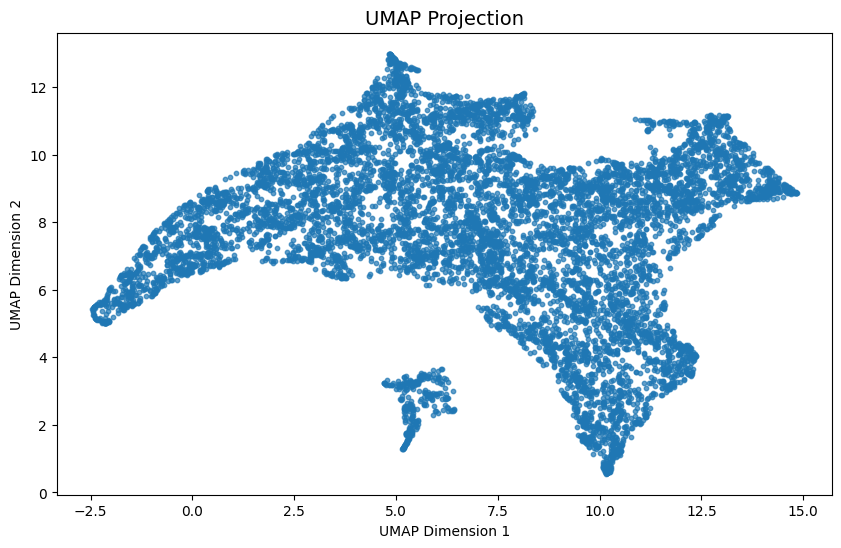

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(rep_df_umap[:, 0], rep_df_umap[:, 1], s=10, alpha=0.7)
plt.title("UMAP Projection", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

C:\Users\William\anaconda3\envs\zoobot\lib\site-packages\umap\plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

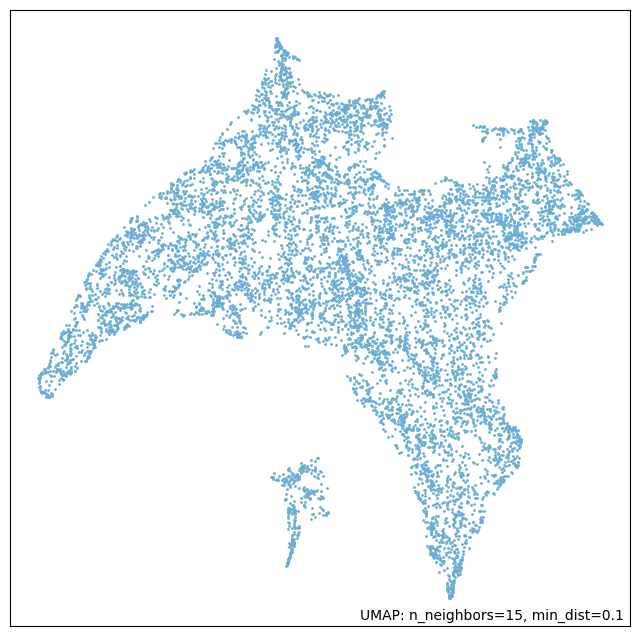

In [92]:
import umap.plot
umap.plot.points(umap_reducer)

In [93]:
rep_df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_630,feat_631,feat_632,feat_633,feat_634,feat_635,feat_636,feat_637,feat_638,feat_639
0,-0.367449,-0.222078,-0.335562,0.081720,-0.215557,-0.273534,0.673446,-0.598967,-0.917981,0.505781,...,-0.770155,-0.450273,0.293663,-0.404689,-0.884849,-0.339024,-0.345153,0.679381,0.000996,1.002824
1,-0.562446,-0.207319,0.049426,-0.289820,0.433802,0.529610,-0.229579,-0.320973,-0.814525,0.347112,...,0.015689,-0.031970,0.084528,0.054638,-0.049942,-0.043318,-0.696671,0.204879,-0.304151,0.360529
2,-0.077018,-0.194042,0.123192,-0.058330,0.345327,0.557212,0.239525,-0.362650,-0.414106,0.251705,...,-0.152498,-0.174095,0.138071,-0.007825,-0.418081,-0.108110,-0.120347,-0.364556,-0.170303,0.619526
3,-0.195923,-0.223630,-0.267228,-0.340382,-0.145976,0.653630,0.828445,-0.114596,-0.534966,0.808387,...,-0.206477,0.080606,0.641564,-0.238713,-0.437052,-0.310839,-0.091563,-0.042538,0.366594,0.793125
4,-0.130860,0.082301,0.275704,-0.233907,0.192407,1.052461,0.080883,-0.320414,-0.679774,0.633709,...,-0.268301,-0.084008,-0.152639,-0.160006,-0.270305,-0.308612,-0.056123,0.079909,-0.529462,0.861375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,-0.151296,-0.325327,0.251906,0.055552,0.467814,0.619330,0.231872,-0.126060,-0.493152,0.584725,...,-0.207638,-0.251776,0.075723,-0.011797,-0.518778,-0.518416,-0.174328,-0.222036,-0.290045,0.787735
9233,0.443765,0.076415,-0.182985,-0.028773,0.238535,0.685532,0.512452,-0.520361,0.393831,-0.374450,...,-0.065476,-0.531277,0.093719,-0.534378,-0.267275,0.562827,0.804517,-0.093903,-0.650267,1.389197
9234,-0.117815,-0.388884,0.105280,0.074905,0.270349,0.710538,0.405553,-0.448439,-0.428910,0.199127,...,-0.416471,-0.161944,0.204102,0.069877,-0.510786,0.049625,-0.141054,-0.304821,-0.001704,0.570686
9235,-0.345194,-0.098469,0.176482,-0.262552,0.209999,0.573540,-0.021061,-0.369997,-0.577640,0.195729,...,-0.121860,-0.322658,-0.013763,0.208193,-0.030576,-0.134984,-0.377076,0.140562,-0.237213,0.770432


In [94]:
save_loc

'C:/Users/William\\results/pytorch/finetune/finetune_galaxy2_classification/hello\\representations_1.hdf5'

In [95]:
results_rep = h5py.File(save_loc, 'r')

In [96]:
results_rep.keys()

<KeysViewHDF5 ['id_str', 'label_cols', 'predictions']>

In [97]:
results_rep['id_str'][0]

b'553402'

In [98]:
df_ids = pd.DataFrame(np.array(h5py.File(save_loc)['id_str']))

In [99]:
df_ids

,0
0,b'553402'
1,b'449744'
2,b'879640'
3,b'340485'
4,b'985545'
...,...
9232,b'414081'
9233,b'937202'
9234,b'623485'
9235,b'408119'


In [100]:
df_ids[0] = df_ids[0].str.decode("utf-8")

In [101]:
df_ids.columns = ['id_str']
df_ids

,id_str
0,553402
1,449744
2,879640
3,340485
4,985545
...,...
9232,414081
9233,937202
9234,623485
9235,408119


In [104]:
labels_mini

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,file_loc
0,100008,38.0,62.0,0.0,D:/images_training_rev1/images_training_rev1\100008.jpg
1,100023,33.0,66.0,1.0,D:/images_training_rev1/images_training_rev1\100023.jpg
2,100053,77.0,18.0,6.0,D:/images_training_rev1/images_training_rev1\100053.jpg
3,100078,69.0,24.0,7.0,D:/images_training_rev1/images_training_rev1\100078.jpg
4,100090,93.0,0.0,7.0,D:/images_training_rev1/images_training_rev1\100090.jpg
...,...,...,...,...,...
61573,999948,51.0,49.0,0.0,D:/images_training_rev1/images_training_rev1\999948.jpg
61574,999950,90.0,10.0,0.0,D:/images_training_rev1/images_training_rev1\999950.jpg
61575,999958,20.0,78.0,2.0,D:/images_training_rev1/images_training_rev1\999958.jpg
61576,999964,9.0,91.0,0.0,D:/images_training_rev1/images_training_rev1\999964.jpg


In [105]:
labels_test = labels_mini[labels_mini['id_str'].isin(df_ids['id_str'])]
labels_test

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,file_loc
4,100090,93.0,0.0,7.0,D:/images_training_rev1/images_training_rev1\100090.jpg
6,100123,46.0,46.0,8.0,D:/images_training_rev1/images_training_rev1\100123.jpg
7,100128,69.0,29.0,2.0,D:/images_training_rev1/images_training_rev1\100128.jpg
34,100513,28.0,70.0,2.0,D:/images_training_rev1/images_training_rev1\100513.jpg
35,100520,4.0,96.0,0.0,D:/images_training_rev1/images_training_rev1\100520.jpg
...,...,...,...,...,...
61560,999689,48.0,52.0,0.0,D:/images_training_rev1/images_training_rev1\999689.jpg
61562,999753,46.0,54.0,0.0,D:/images_training_rev1/images_training_rev1\999753.jpg
61565,999786,80.0,17.0,3.0,D:/images_training_rev1/images_training_rev1\999786.jpg
61567,999873,53.0,43.0,4.0,D:/images_training_rev1/images_training_rev1\999873.jpg


In [125]:
labels_test_index = labels_test.reset_index(drop = True)

In [126]:
labels_test_index

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,file_loc
0,100090,93.0,0.0,7.0,D:/images_training_rev1/images_training_rev1\100090.jpg
1,100123,46.0,46.0,8.0,D:/images_training_rev1/images_training_rev1\100123.jpg
2,100128,69.0,29.0,2.0,D:/images_training_rev1/images_training_rev1\100128.jpg
3,100513,28.0,70.0,2.0,D:/images_training_rev1/images_training_rev1\100513.jpg
4,100520,4.0,96.0,0.0,D:/images_training_rev1/images_training_rev1\100520.jpg
...,...,...,...,...,...
9232,999689,48.0,52.0,0.0,D:/images_training_rev1/images_training_rev1\999689.jpg
9233,999753,46.0,54.0,0.0,D:/images_training_rev1/images_training_rev1\999753.jpg
9234,999786,80.0,17.0,3.0,D:/images_training_rev1/images_training_rev1\999786.jpg
9235,999873,53.0,43.0,4.0,D:/images_training_rev1/images_training_rev1\999873.jpg


In [124]:
umap_reducer.embedding_.shape

(9237, 2)

In [128]:
from PIL import Image

In [133]:
 #Select a random galaxy index
embedding = umap_reducer.embedding_
# Example setup
# embedding = np.random.rand(9237, 2)  # Replace with your actual embedding (9237x2)
# labels_test_index = pd.DataFrame(...)  # Replace with your actual DataFrame

random_indices = np.random.choice(embedding.shape[0], size=6, replace=False)

# Create a single large figure for all 6 rows of plots
fig, axes = plt.subplots(6, 6, figsize=(18, 30))  # 6 rows x 6 columns grid

for row_idx, random_index in enumerate(random_indices):
    # Compute Euclidean distances from the random galaxy to all other galaxies
    distances = np.linalg.norm(embedding - embedding[random_index], axis=1)

    # Get the indices of the 5 closest neighbors (excluding itself)
    closest_indices = np.argsort(distances)[1:6]  # Skip the first one (distance 0 to itself)

    # Get the file paths for the selected galaxy and its 5 neighbors
    selected_paths = [labels_test_index.iloc[random_index, 4]] + [
        labels_test_index.iloc[i, 4] for i in closest_indices
    ]

    # Plot the images for this row
    for col_idx, path in enumerate(selected_paths):
        img = Image.open(path)  # Load image
        ax = axes[row_idx, col_idx]  # Access the correct subplot
        ax.imshow(img)
        ax.axis("off")
        if col_idx == 0:
            ax.set_title(f"Galaxy {row_idx + 1} (Selected)")
        else:
            ax.set_title(f"Neighbor {col_idx}")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("6 Random Galaxies and Their 5 Closest Neighbors using Zoobot", fontsize=20)

# Save the entire plot to a file
plt.savefig("zoobot_neighbours.jpg", dpi=300)
plt.close()  # Close the plot after saving

In [110]:
labels_test_numbers = labels_test.iloc[:, 1:-1]
labels_test_numbers

,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact
4,93.0,0.0,7.0
6,46.0,46.0,8.0
7,69.0,29.0,2.0
34,28.0,70.0,2.0
35,4.0,96.0,0.0
...,...,...,...
61560,48.0,52.0,0.0
61562,46.0,54.0,0.0
61565,80.0,17.0,3.0
61567,53.0,43.0,4.0


In [113]:
custom_labels = []

for _, row in labels_test_numbers.iterrows():
    # Find the index of the max value among the columns 0, 1, 2
    max_col_index = row.iloc[0:3].idxmax()  # Get the column *label* (not integer index)
    
    # Use the actual column labels in the comparison
    if max_col_index == labels_test_numbers.columns[0]:  # If column 0 (label) has the greatest value
        custom_labels.append('smooth')
    elif max_col_index == labels_test_numbers.columns[1]:  # If column 1 (label) has the greatest value
        custom_labels.append('disk')
    elif max_col_index == labels_test_numbers.columns[2]:  # If column 2 (label) has the greatest value
        custom_labels.append('artifact')

print(custom_labels)


['smooth', 'smooth', 'smooth', 'disk', 'disk', 'smooth', 'disk', 'smooth', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'smooth', 'disk', 'smooth', 'smooth', 'disk', 'smooth', 'smooth', 'disk', 'smooth', 'disk', 'disk', 'smooth', 'disk', 'disk', 'disk', 'disk', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'smooth', 'disk', 'disk', 'disk', 'disk', 'smooth', 'disk', 'disk', 'smooth', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'disk', 'smooth', 'disk', 'smooth', 'disk', 'disk', 'disk', 'disk', 'smooth', 'disk', 'disk', 'disk', 'smooth', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'disk', 'smooth', 'smooth', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'disk', 'smooth', 'smooth', 'smooth', 'disk', 'disk', 'disk', 'disk', 'disk', 'disk', 'disk', 'smooth', 'smooth', 'di

<Axes: >

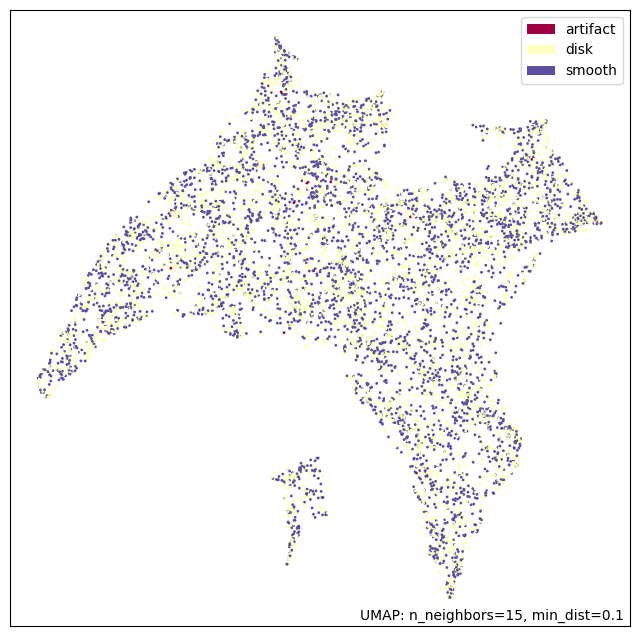

In [114]:
umap.plot.points(umap_reducer, labels = np.array(custom_labels))

<Axes: >

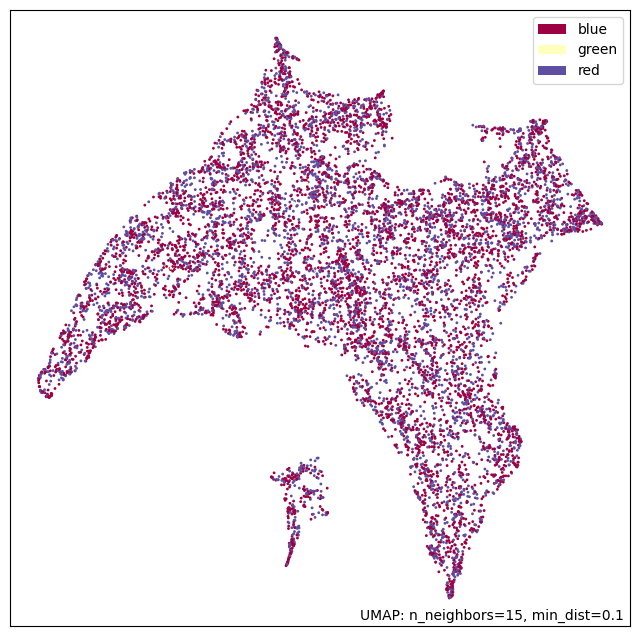

In [115]:
# Define a mapping from labels to colors
label_to_color = {
    'smooth': 'red',
    'disk': 'blue',
    'artifact': 'green',
}

# Map the labels to their corresponding colors
color_labels = np.array([label_to_color[label] for label in custom_labels])

# Plot with custom colors
umap.plot.points(umap_reducer, labels=color_labels)

<Axes: >

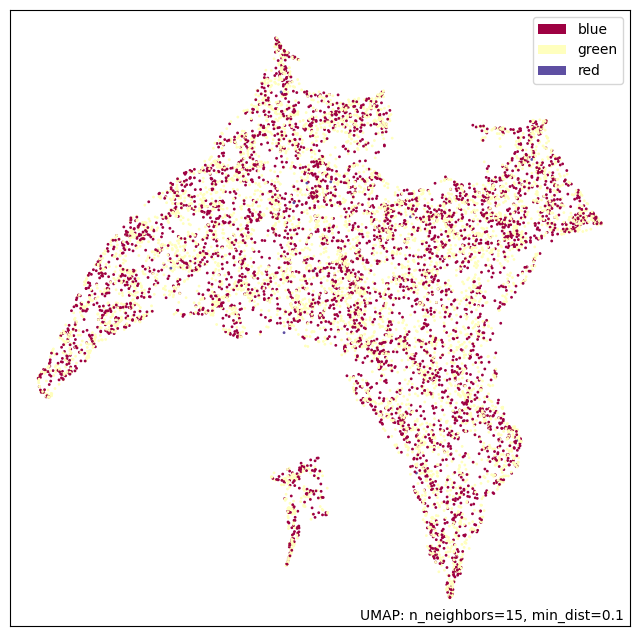

In [116]:
import numpy as np
import umap.plot

# Define a custom mapping of labels to colors
label_to_color = {
    'smooth': 'blue',
    'disk': 'green',
    'artifact': 'red'
}

# Map your labels to their colors
color_labels = np.array([label_to_color[label] for label in custom_labels])

# Create the UMAP plot with the new colors
umap.plot.points(umap_reducer, labels=color_labels)

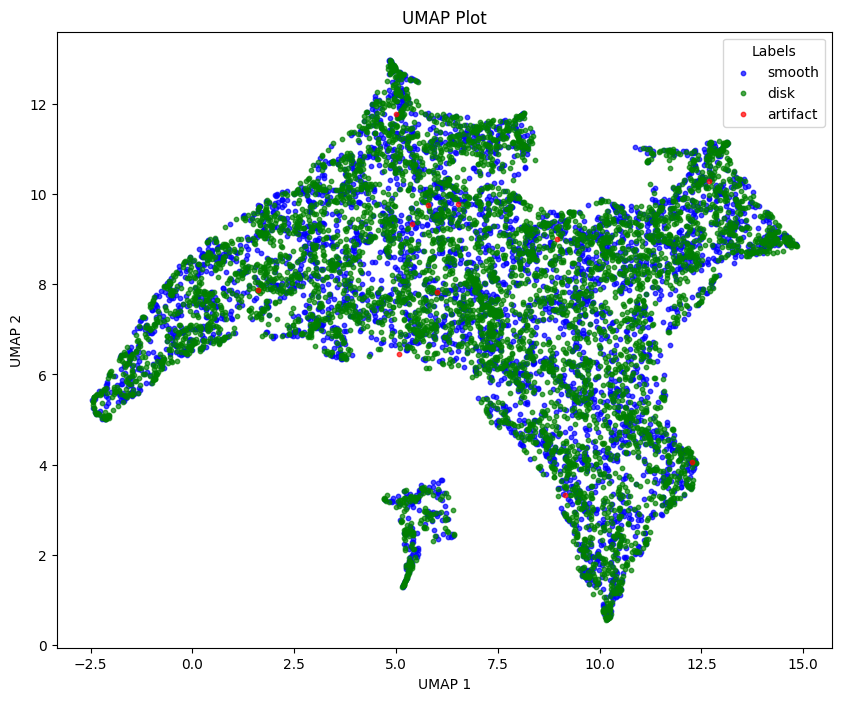

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Extract UMAP 2D embedding coordinates
umap_coords = umap_reducer.embedding_

# Define a mapping of labels to colors
label_to_color = {
    'smooth': 'blue',
    'disk': 'green',
    'artifact': 'red'
}

# Map the labels to colors
color_labels = np.array([label_to_color[label] for label in custom_labels])

# Plot using plt.scatter
plt.figure(figsize=(10, 8))
for label, color in label_to_color.items():
    # Filter points for the current label
    idx = np.array(custom_labels) == label
    plt.scatter(umap_coords[idx, 0], umap_coords[idx, 1], c=color, label=label, s=10, alpha=0.7)

# Add legend and labels
plt.legend(title="Labels")
plt.title("UMAP Plot")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.savefig("zoobot_umap.jpg")
plt.show()
